In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


# **Digit Recogniser Using CNN (Keras)**

Just a simple digit recogniser made using Keras. Nothing too exciting, just a bit of a play around. I will list the online resources I used here:

- https://www.kaggle.com/poonaml/deep-neural-network-keras-way
- https://www.kaggle.com/indronil2489/digit-recognizer-using-neural-networks
- https://www.sitepoint.com/keras-digit-recognition-tutorial/

# Loading in the data

In [2]:
#The first thing to do is to read in training data

train_data = pd.read_csv('train.csv')

#will show us the first 5 rows of the data set 
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Will give us some info of the data object itself
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
#will give us so stats about each column of the data frame - expecially useful for seeing quickly if there are any missing entries
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
#lets also get a quick idea of the split in the data set between the different digits - turns out that the split looks fairly even(-ish)
train_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Ok so now we have got a pretty good overview of the train data - lets quickly do the same thing with the test data

In [6]:
test_data = pd.read_csv('test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [8]:
test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
#lets just do a final couple things to get the data into a suibtable form 

y_train = train_data['label']
X_train = train_data.drop('label', axis=1)

#needs to be an array to be fed into the neural network
X_train = X_train.values.astype('float32')
y_train = y_train.values.astype('int32')
X_test = test_data.values.astype('float32')

In [10]:
#check that the data is in the forms that we want 
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [12]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Also note that the class data needs to be catagorial - this can be easily done using inbuilt keras functions
(one-hot encoding)

In [13]:
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train,num_classes)

y_train

Using TensorFlow backend.


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Data Visualisation 

To get a better idea of what is going on - it is always good to plot the data and have a look at what is going on!

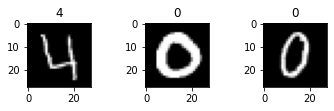

In [14]:
#Need to convert the data sets to (num_images, img_rows, img_cols) format

X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

#plot some of the training data
for i in range (3,6):
    plt.subplot(330 + (i+1)) #not exactly sure why this is how you get the subplot to work ... but just go with it
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(np.where(y_train[i] ==1)[0][0])

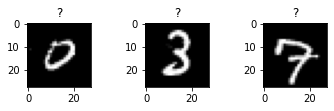

In [15]:
#plot some of the test data
for i in range (3,6):
    plt.subplot(330 + (i+1)) #not exactly sure why this is how you get the subplot to work ... but just go with it
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
    plt.title('?')

In [16]:
#we now expand the dimensions for the colour channel grey
#need to be of the form MxNxC for the keras api
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Build the CNN

Now we will use keras to build the CNN - in the first instance this is quite simple and follows one of the versions highlighted above

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#first create an empty model
model = Sequential()

#now add layers to the model
#N.B. stride is how far the 'position' of the filter is moved at each step (effectively downsampling if it is more than 1)
model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), activation = 'tanh', input_shape=(28,28,1))) #remember the number of channels after the convolution is the number of filters beforehand
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(Conv2D(64, kernel_size=(5,5), strides = (1,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.1)) #randomly drops 10% of the input units - should avoid overfitting
model.add(Flatten()) #flatten - tensor --> vector (n*(c*h*w)) (batch size * massive vector)
model.add(Dense(1000, activation = 'relu')) #a dense layer is the a fully connected layer
#The final layer needs to have the same size as the number of classes!
model.add(Dense(num_classes, activation = 'softmax')) #softmax is the normalized exponential function

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)             

In [18]:
#now lets compile the model

model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])


We run the training with the GPU - which helps the model to train roughly 3-5x quicker than just with the CPU

The accuracy metric shown here is calculated on the batch that we use - i.e. the accuracy on the training data set. The fit() method can calculate the validation accuracy for us automatically - which is super useful! 

In [19]:
#and lets train the model!

batch_size = 128
epochs = 30
val_proportion = 0.2

history = model.fit(x = X_train, y = y_train, batch_size=30, epochs=epochs, verbose=1, validation_split = .2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 10s 303us/step - loss: 0.1527 - accuracy: 0.9531 - val_loss: 0.0903 - val_accuracy: 0.9715
Epoch 2/30
33600/33600 [==============================] - 6s 179us/step - loss: 0.0713 - accuracy: 0.9788 - val_loss: 0.0755 - val_accuracy: 0.9781
Epoch 3/30
33600/33600 [==============================] - 6s 171us/step - loss: 0.0625 - accuracy: 0.9816 - val_loss: 0.0670 - val_accuracy: 0.9827
Epoch 4/30
33600/33600 [==============================] - 6s 173us/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0913 - val_accuracy: 0.9780
Epoch 5/30
33600/33600 [==============================] - 6s 172us/step - loss: 0.0487 - accuracy: 0.9856 - val_loss: 0.0599 - val_accuracy: 0.9854
Epoch 6/30
33600/33600 [==============================] - 6s 173us/step - loss: 0.0447 - accuracy: 0.9871 - val_loss: 0.0654 - val_accuracy: 0.9824
Epoch 7/30
33600/33600 [==============================] - 6s 1

Now that we have trained the model a common step is to plot the process of the loss and the accuracy, for both the training and validation data set, to see the progress

In [20]:
history_dict = history.history

In [21]:
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['val_accuracy']
val_accuracy  = history_dict['accuracy']


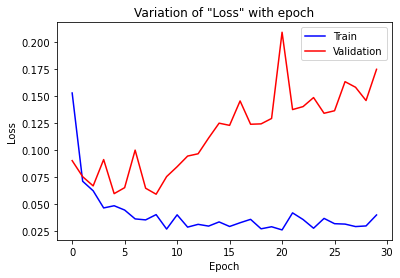

In [22]:
#first plot the loss 

plt.plot(train_loss, color= 'b',label='Train')
plt.plot(val_loss,'r',label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.title('Variation of "Loss" with epoch')

plt.show()


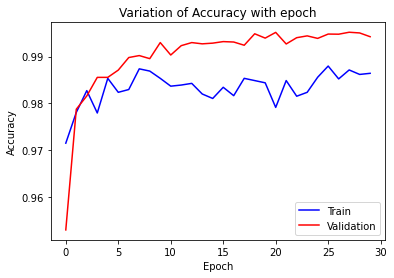

In [23]:
#now plot the accuracy

plt.plot(train_accuracy, color= 'b',label='Train')
plt.plot(val_accuracy,'r',label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Variation of Accuracy with epoch')

plt.show()

Validation Loss increasing whilst the Validation acuracy also increases suggests that all may not be as it seem. The model may be overfitting. This is worth checkin in more detail if we were to want to deploy this model.

Since this is just a quick play around not going to dive into too much detail here!

# Now that we have trained the model we can use it to plot some predictions!

In [24]:
#make some predictions!
predictions = model.predict_classes(X_test, verbose = 1)

28000/28000 [==============================] - 1s 51us/step


In [25]:
#lets output these predictions in a form that can be submitted to kaggle - to see how well we do
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR_predictions.csv", index=False, header=True)

To have a bit of an extra investigation of what the predictions are like - lets plot some of the test data and get it against the predicted label

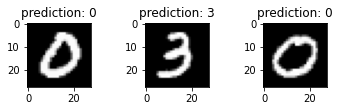

In [26]:
#need to 'undo' the reshape that we did earlier 
X_test = X_test.reshape(X_test.shape[0], 28, 28)

#now plot
for i in range (6,9):
    plt.subplot(330 + (i+1)) #not exactly sure why this is how you get the subplot to work ... but just go with it
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
    plt.title('prediction: ' + str(predictions[i]))

In [27]:
model.save('digit-recogniser-model')